### Scénario

Vous êtes un professionnel des données travaillant pour Salifort Motors.

Actuellement, le taux de rotation des employés de Salifort est élevé. (Remarque : dans ce contexte, les données relatives à la rotation comprennent à la fois les employés qui choisissent de quitter leur emploi et ceux qui sont licenciés). L'équipe dirigeante de Salifort est préoccupée par le nombre d'employés qui quittent l'entreprise. Salifort s'efforce de créer une culture d'entreprise qui favorise la réussite et le développement professionnel des employés. En outre, le taux de rotation élevé est coûteux sur le plan financier. Salifort investit beaucoup dans le recrutement, la formation et le perfectionnement de ses employés.

Si Salifort pouvait prédire si un employé quittera l'entreprise et découvrir les raisons de son départ, elle pourrait mieux comprendre le problème et élaborer une solution.

Dans un premier temps, l'équipe de direction demande aux ressources humaines de mener une enquête auprès d'un échantillon d'employés afin d'en savoir plus sur les causes possibles de la rotation du personnel.

Ensuite, l'équipe de direction vous demande d'analyser les données de l'enquête et de proposer des idées pour accroître la fidélisation des salariés. Pour ce faire, elle vous suggère de concevoir un modèle permettant de prédire si un employé quittera l'entreprise en fonction de sa fonction, de son service, du nombre de projets, du nombre moyen d'heures par mois et de tout autre point de données pertinent. Un bon modèle aidera l'entreprise à augmenter la rétention et la satisfaction professionnelle des employés actuels, et à économiser de l'argent et du temps pour la formation des nouveaux employés.

En tant que spécialiste de l'analyse des données, l'équipe de direction vous laisse le soin de choisir une approche pour construire le modèle le plus efficace pour prédire le départ des employés. Par exemple, vous pourriez construire et évaluer un modèle statistique tel que la régression logistique. Vous pouvez également élaborer et évaluer des modèles d'apprentissage automatique tels que l'arbre décisionnel, la forêt aléatoire et XGBoost. Vous pouvez également choisir de déployer à la fois des modèles statistiques et des modèles d'apprentissage automatique.

Quelle que soit l'approche retenue, vous devrez analyser les facteurs clés de la rotation du personnel, élaborer un modèle efficace et partager avec l'équipe de direction des recommandations sur les prochaines étapes.

### Nous allons travailler selon le model PACE

![alt text](download.png)

# `P`ace : Plan

Dans cette partie on va essayer de comprendre le scenario et le probleme que l'on doit résoudre

### 1 - Importation des packages

In [16]:
# Importation des packages

# Pour la manipulation de données
import numpy as np
import pandas as pd

# Pour la visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Pour afficher toutes les colonnes de notre dataframe
pd.set_option('display.max_columns', None)

# Pour la modélisation
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Pour nos métriques
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# Pour enrigistrer nos models
import pickle

### On charge les données

In [17]:
# Load dataset into a dataframe
df0 = pd.read_csv("HR_capstone_dataset.csv")

# Display first few rows of the dataframe
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### 2 - Exploration des données EDA

#### Informations basiques sur notre dataset

In [18]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Statistiques Descriptives 

In [19]:
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### On renomme les colonnes

In [20]:
#On affiche les colonnes
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [21]:
# Rename columns as needed

df0 = df0.rename(columns={'Work_accident': 'work_accident',
                          'average_montly_hours': 'average_monthly_hours',
                          'time_spend_company': 'tenure',
                          'Department': 'department'})

# Display all column names after the update
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### On recherche les valeurs manquantes

In [22]:
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

On a pas de valeurs manquantes dans notre dataset

### Les valeurs dupiquées

In [23]:
df0.duplicated().sum()

np.int64(3008)

Nous avons donc 3008 données dupliquées dans notre dataset ce qui en représente 20%

In [24]:
# Inspectons quelques colonnes contenants des valeurs dupliquées
df0[df0.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


Les doublons détectés dans le jeu de données sont très probablement des erreurs plutôt que des entrées légitimes. Il est très peu probable que deux employés aient donné exactement les mêmes réponses sur toutes les colonnes, surtout si plusieurs variables sont continues (ex. : heures de travail mensuelles moyennes, nombre de projets, etc.)

In [25]:
# Drop duplicates and save resulting dataframe in a new variable as needed

df1 = df0.drop_duplicates(keep='first')

# Display first few rows of new dataframe as needed
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Verification des outliers

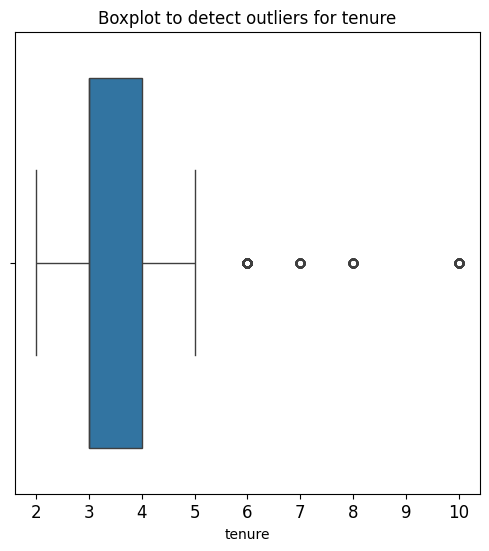

In [26]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize=(6,6))
plt.title('Boxplot to detect outliers for tenure', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df1['tenure'])
plt.show()

Ce Schéma nous montre qu'il y à des valeurs abérrantes dans `tenure`

In [28]:
# Determine the number of rows containing outliers 

# Compute the 25th percentile value in `tenure`
percentile25 = df1['tenure'].quantile(0.25)

# Compute the 75th percentile value in `tenure`
percentile75 = df1['tenure'].quantile(0.75)

# Compute the interquartile range in `tenure`
iqr = percentile75 - percentile25

# Define the upper limit and lower limit for non-outlier values in `tenure`
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

# Identify subset of data containing outliers in `tenure`
outliers = df1[(df1['tenure'] > upper_limit) | (df1['tenure'] < lower_limit)]

# Count how many rows in the data contain outliers in `tenure`
print("Number of rows in the data containing outliers in `tenure`:", len(outliers))

Lower limit: 1.5
Upper limit: 5.5
Number of rows in the data containing outliers in `tenure`: 824


# p`A`ce : Analyse

#### 2 - Exploration des données (EDA Suite)

On va essayer de voir le pourcentage d'employés qui quittent l'entreprise

In [29]:
# Get numbers of people who left vs. stayed

print(df1['left'].value_counts())
print()

# Get percentages of people who left vs. stayed

print(df1['left'].value_counts(normalize=True))

left
0    10000
1     1991
Name: count, dtype: int64

left
0    0.833959
1    0.166041
Name: proportion, dtype: float64


On remarque que 16 % des employés quittent l'entreprise

### Visualisation des données

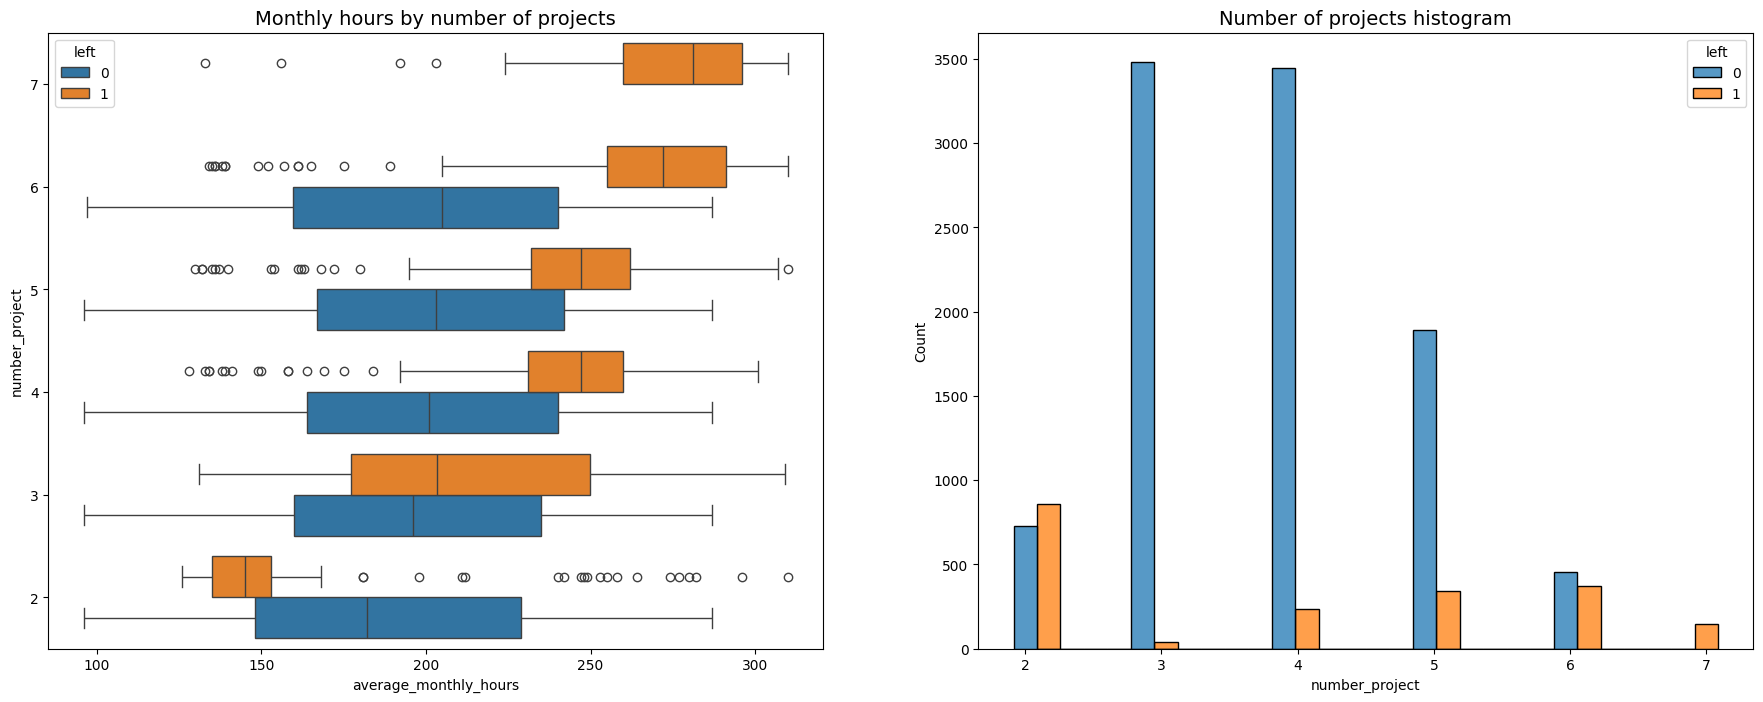

In [30]:
# Create a plot as needed 
### YOUR CODE HERE ###

# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing `average_monthly_hours` distributions for `number_project`, comparing employees who stayed versus those who left
sns.boxplot(data=df1, x='average_monthly_hours', y='number_project', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects', fontsize='14')

# Create histogram showing distribution of `number_project`, comparing employees who stayed versus those who left
tenure_stay = df1[df1['left']==0]['number_project']
tenure_left = df1[df1['left']==1]['number_project']
sns.histplot(data=df1, x='number_project', hue='left', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Number of projects histogram', fontsize='14')

# Display the plots
plt.show()

1. Diagramme en boîte (Boxplot) : "Monthly hours by number of projects"


Ce graphique montre la distribution des heures de travail mensuelles moyennes pour différents nombres de projets, en distinguant ceux qui sont partis (left = 1, en orange) et ceux qui sont restés (left = 0, en bleu).

Observations :
Faible nombre de projets (2-3) :

Les employés ayant 2 projets ont un faible nombre d'heures de travail mensuelles et un taux de départ relativement faible, mais il existe quelques cas où les employés ont quitté l'entreprise.
Ceux ayant 3 projets montrent une augmentation du taux de départ (plus d’orange visible), ce qui pourrait indiquer une surcharge de travail ou un mécontentement.
Nombre de projets intermédiaire (4-5) :

Les employés avec 4 et 5 projets travaillent plus d’heures en moyenne et ont une proportion importante de départs (plus d’orange).
Cela suggère qu’un nombre modéré de projets pourrait être un facteur contribuant au turnover.
Nombre élevé de projets (6-7) :

Les employés ayant 6 ou 7 projets travaillent de longues heures et montrent un taux de départ élevé.
Ceux avec 7 projets ont presque exclusivement quitté l’entreprise, ce qui signifie probablement une surcharge de travail insoutenable.
Interprétation :
Un excès de travail (nombre élevé de projets et d'heures travaillées) est un facteur de turnover.
Un très faible nombre de projets semble également associé à des départs, ce qui peut suggérer un manque de challenge ou de reconnaissance.



2. Histogramme : "Number of projects histogram"
Ce graphique montre la distribution du nombre de projets en fonction du statut de départ des employés.

Observations :
Les employés ayant 3 ou 4 projets sont majoritairement restés (bleu dominant).
Le taux de départ augmente pour les employés ayant 2, 6 ou 7 projets (plus d’orange).
La majorité des employés se concentrent autour de 3 à 5 projets, avec un pic clair à 3 et 4 projets.
Le taux de départ est élevé pour 2 projets (sous-engagement) et 6-7 projets (surcharge de travail).
Interprétation :
Un nombre modéré de projets (3 à 5) semble être la zone de stabilité.
Trop peu ou trop de projets peut conduire à une insatisfaction et à une augmentation du turnover.
L’entreprise pourrait bénéficier d’une meilleure répartition du travail pour éviter que des employés aient trop ou trop peu de projets.


Conclusions générales
Les employés ayant un nombre excessif de projets (6-7) ont un risque de turnover très élevé.
→ Action : Limiter la charge de travail excessive et équilibrer la répartition des projets.

Un nombre trop faible de projets (2) peut également conduire au départ.
→ Action : Identifier si ces employés manquent de motivation, de reconnaissance ou d’opportunités de croissance.

Les employés ayant 3 à 5 projets semblent être les plus stables.
→ Action : Trouver un équilibre optimal entre charge de travail et satisfaction.

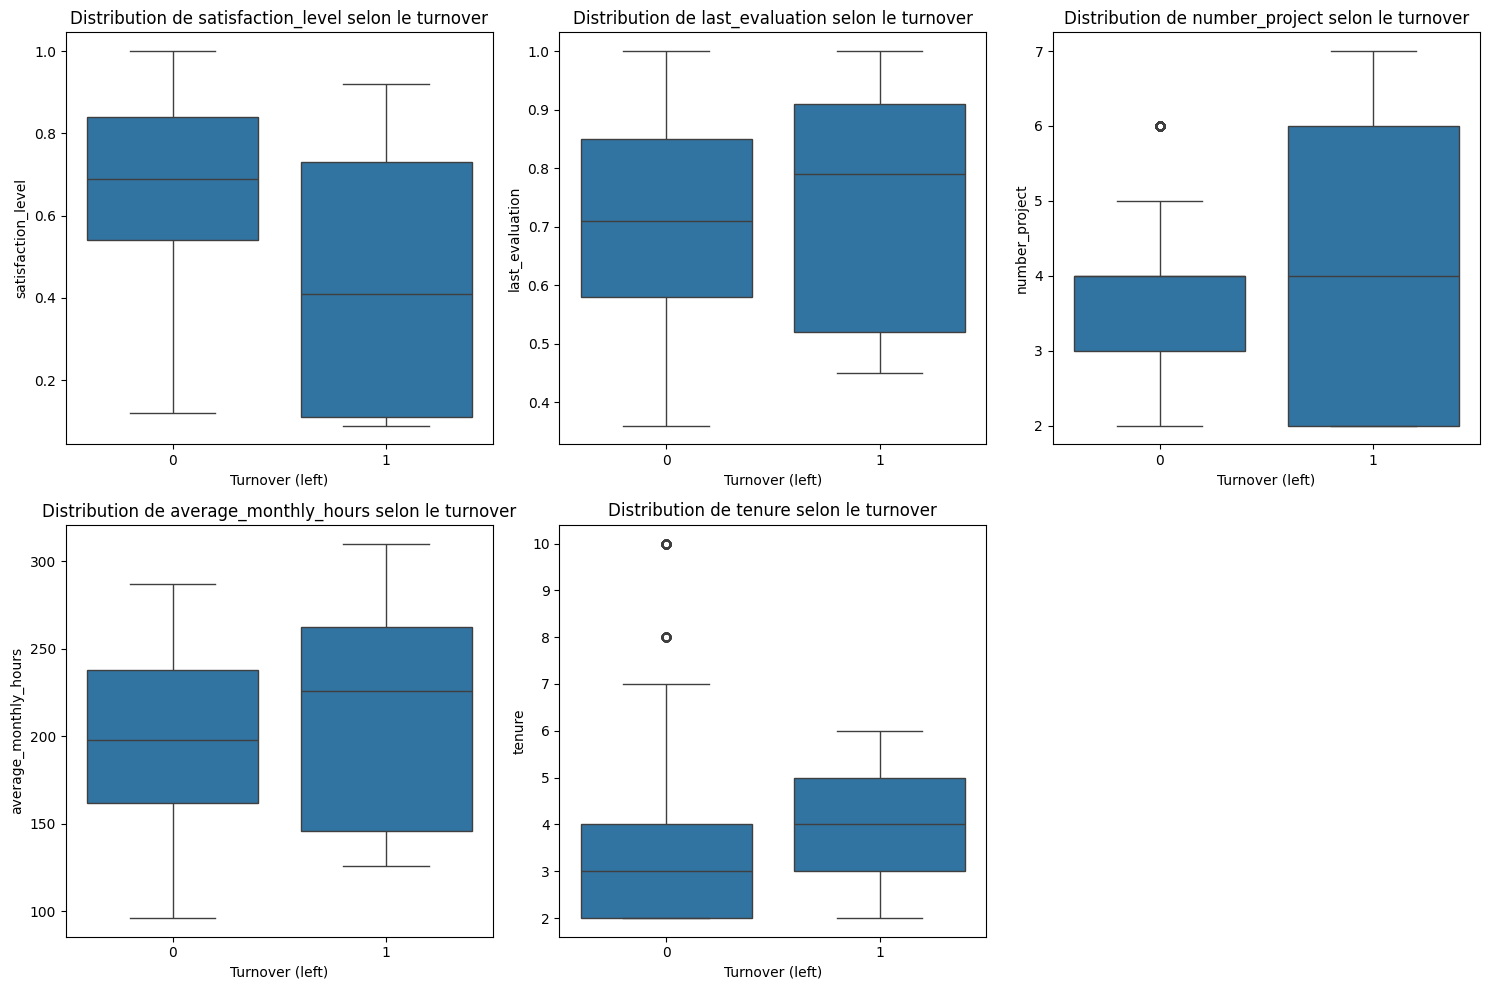

In [33]:
plt.figure(figsize=(15, 10))

# Liste des variables à analyser avec des boxplots
variables = ['satisfaction_level', 'last_evaluation', 'number_project',
             'average_monthly_hours', 'tenure']

# Création des boxplots pour chaque variable en fonction de "left"
for i, var in enumerate(variables, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df1['left'], y=df1[var])
    plt.title(f"Distribution de {var} selon le turnover")
    plt.xlabel("Turnover (left)")
    plt.ylabel(var)

# Ajustement de l'affichage
plt.tight_layout()
plt.show()


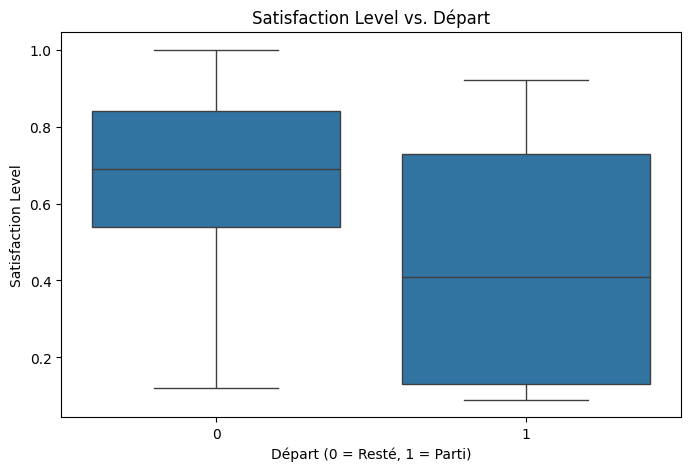

In [37]:
# Create a plot as needed
### YOUR CODE HERE ###

# 🔹 1. Satisfaction Level vs. Départ (Boxplot)
plt.figure(figsize=(8,5))
sns.boxplot(x="left", y="satisfaction_level", data=df0)
plt.title("Satisfaction Level vs. Départ")
plt.xlabel("Départ (0 = Resté, 1 = Parti)")
plt.ylabel("Satisfaction Level")
plt.show()




1. Satisfaction Level vs Turnover (Boxplot)
Observations :
Les employés qui restent ont un niveau de satisfaction moyen très élevé (près de 0.8).
Ceux qui partent ont un niveau de satisfaction beaucoup plus faible, souvent inférieur à 0.5.
Conclusion :
Un faible niveau de satisfaction est un facteur majeur de départ.
Il est crucial d’améliorer la satisfaction des employés pour réduire le turnover.

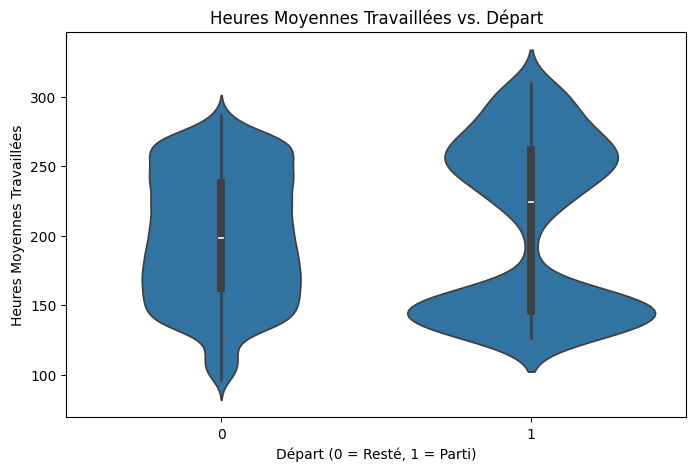

In [38]:
# 🔹 2. Heures Moyennes vs. Départ (Violin Plot)
plt.figure(figsize=(8,5))
sns.violinplot(x="left", y="average_monthly_hours", data=df0)
plt.title("Heures Moyennes Travaillées vs. Départ")
plt.xlabel("Départ (0 = Resté, 1 = Parti)")
plt.ylabel("Heures Moyennes Travaillées")
plt.show()


2. Heures Moyennes Travaillées vs Turnover (Violin Plot)
Observations :
Ceux qui restent ont un nombre d’heures de travail plus modéré, généralement autour de 150 à 250 heures par mois.
Ceux qui partent ont une distribution des heures de travail plus large, avec des pics à des heures extrêmes (très faibles ou très élevées).
Conclusion :
Les employés qui travaillent trop ou trop peu d’heures semblent être plus susceptibles de partir.
La gestion de la charge de travail (éviter les heures extrêmes) pourrait améliorer la rétention.

C:\Users\yohar\AppData\Local\Temp\ipykernel_24776\3458426663.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="number_project", y="left", data=df0, ci=None)


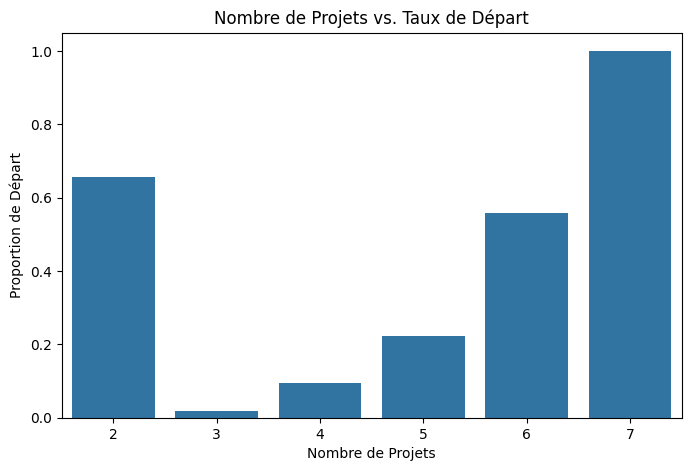

In [39]:

# 🔹 3. Nombre de Projets vs. Départ (Barplot)
plt.figure(figsize=(8,5))
sns.barplot(x="number_project", y="left", data=df0, ci=None)
plt.title("Nombre de Projets vs. Taux de Départ")
plt.xlabel("Nombre de Projets")
plt.ylabel("Proportion de Départ")
plt.show()


3. Nombre de Projets vs Turnover (Barplot)
Observations :

Les employés ayant 2 projets ont un taux de départ élevé, tandis que ceux avec 3 ou 4 projets ont un taux de départ relativement faible.
Les employés avec 6 ou 7 projets ont également un taux de départ élevé.
Conclusion :

Un nombre de projets trop faible ou trop élevé semble être associé à un taux de départ plus élevé.
Il est essentiel d’équilibrer la charge de travail avec un nombre modéré de projets (environ 3 à 5 projets).

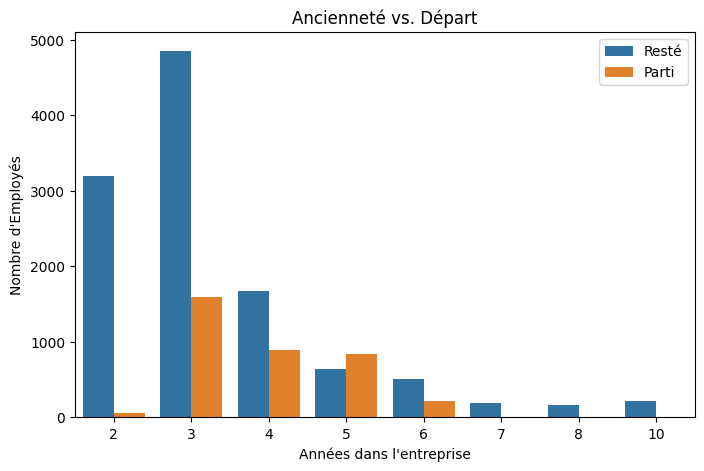

In [40]:

# 🔹 4. Ancienneté (Time Spent) vs. Départ (Countplot)
plt.figure(figsize=(8,5))
sns.countplot(x="tenure", hue="left", data=df0)
plt.title("Ancienneté vs. Départ")
plt.xlabel("Années dans l'entreprise")
plt.ylabel("Nombre d'Employés")
plt.legend(["Resté", "Parti"])
plt.show()


4. Ancienneté vs Turnover (Barplot)
Observations :

Le taux de départ est plus élevé chez les employés ayant moins de 3 ans d'ancienneté, avec un pic entre 2 et 3 ans.
Les employés ayant plus de 3 ans d’ancienneté montrent un taux de départ plus faible.
Conclusion :

Les nouveaux employés (moins de 3 ans) sont plus susceptibles de partir, suggérant un besoin d’améliorer l’intégration et la gestion des premiers mois.
Une meilleure intégration et suivi des nouveaux employés pourrait améliorer la rétention.

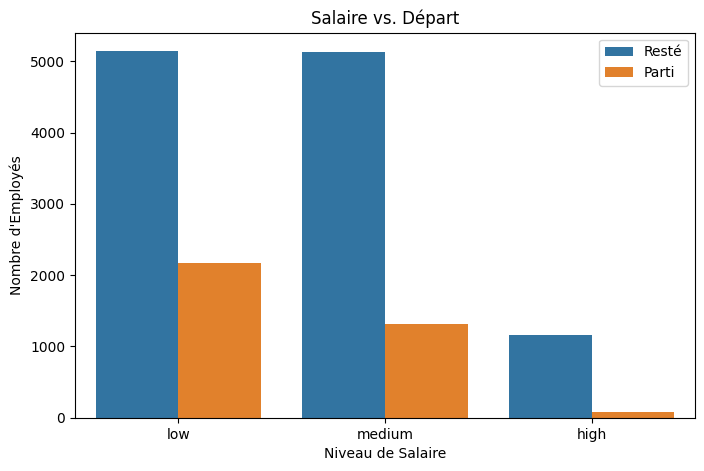

In [41]:

# 🔹 5. Salaire vs. Départ (Countplot)
plt.figure(figsize=(8,5))
sns.countplot(x="salary", hue="left", data=df0, order=["low", "medium", "high"])
plt.title("Salaire vs. Départ")
plt.xlabel("Niveau de Salaire")
plt.ylabel("Nombre d'Employés")
plt.legend(["Resté", "Parti"])
plt.show()

5. Salaire vs Turnover (Barplot)
Observations :
Les employés avec un salaire bas (low) ont un taux de départ beaucoup plus élevé que ceux avec un salaire moyen ou élevé.
Conclusion :
Le salaire a un impact important sur la fidélisation des employés. Les employés mal rémunérés sont plus susceptibles de partir.
Il peut être pertinent de réévaluer les salaires pour les employés dans les catégories de salaire faible afin d'améliorer la rétention.

Confirmons que les employés avec 7 projets quittent bien l'entreprise

In [42]:
# Get value counts of stayed/left for employees with 7 projects
df1[df1['number_project']==7]['left'].value_counts()

left
1    145
Name: count, dtype: int64

Ceci confirme que tous les employés ayant 7 projets sont parti

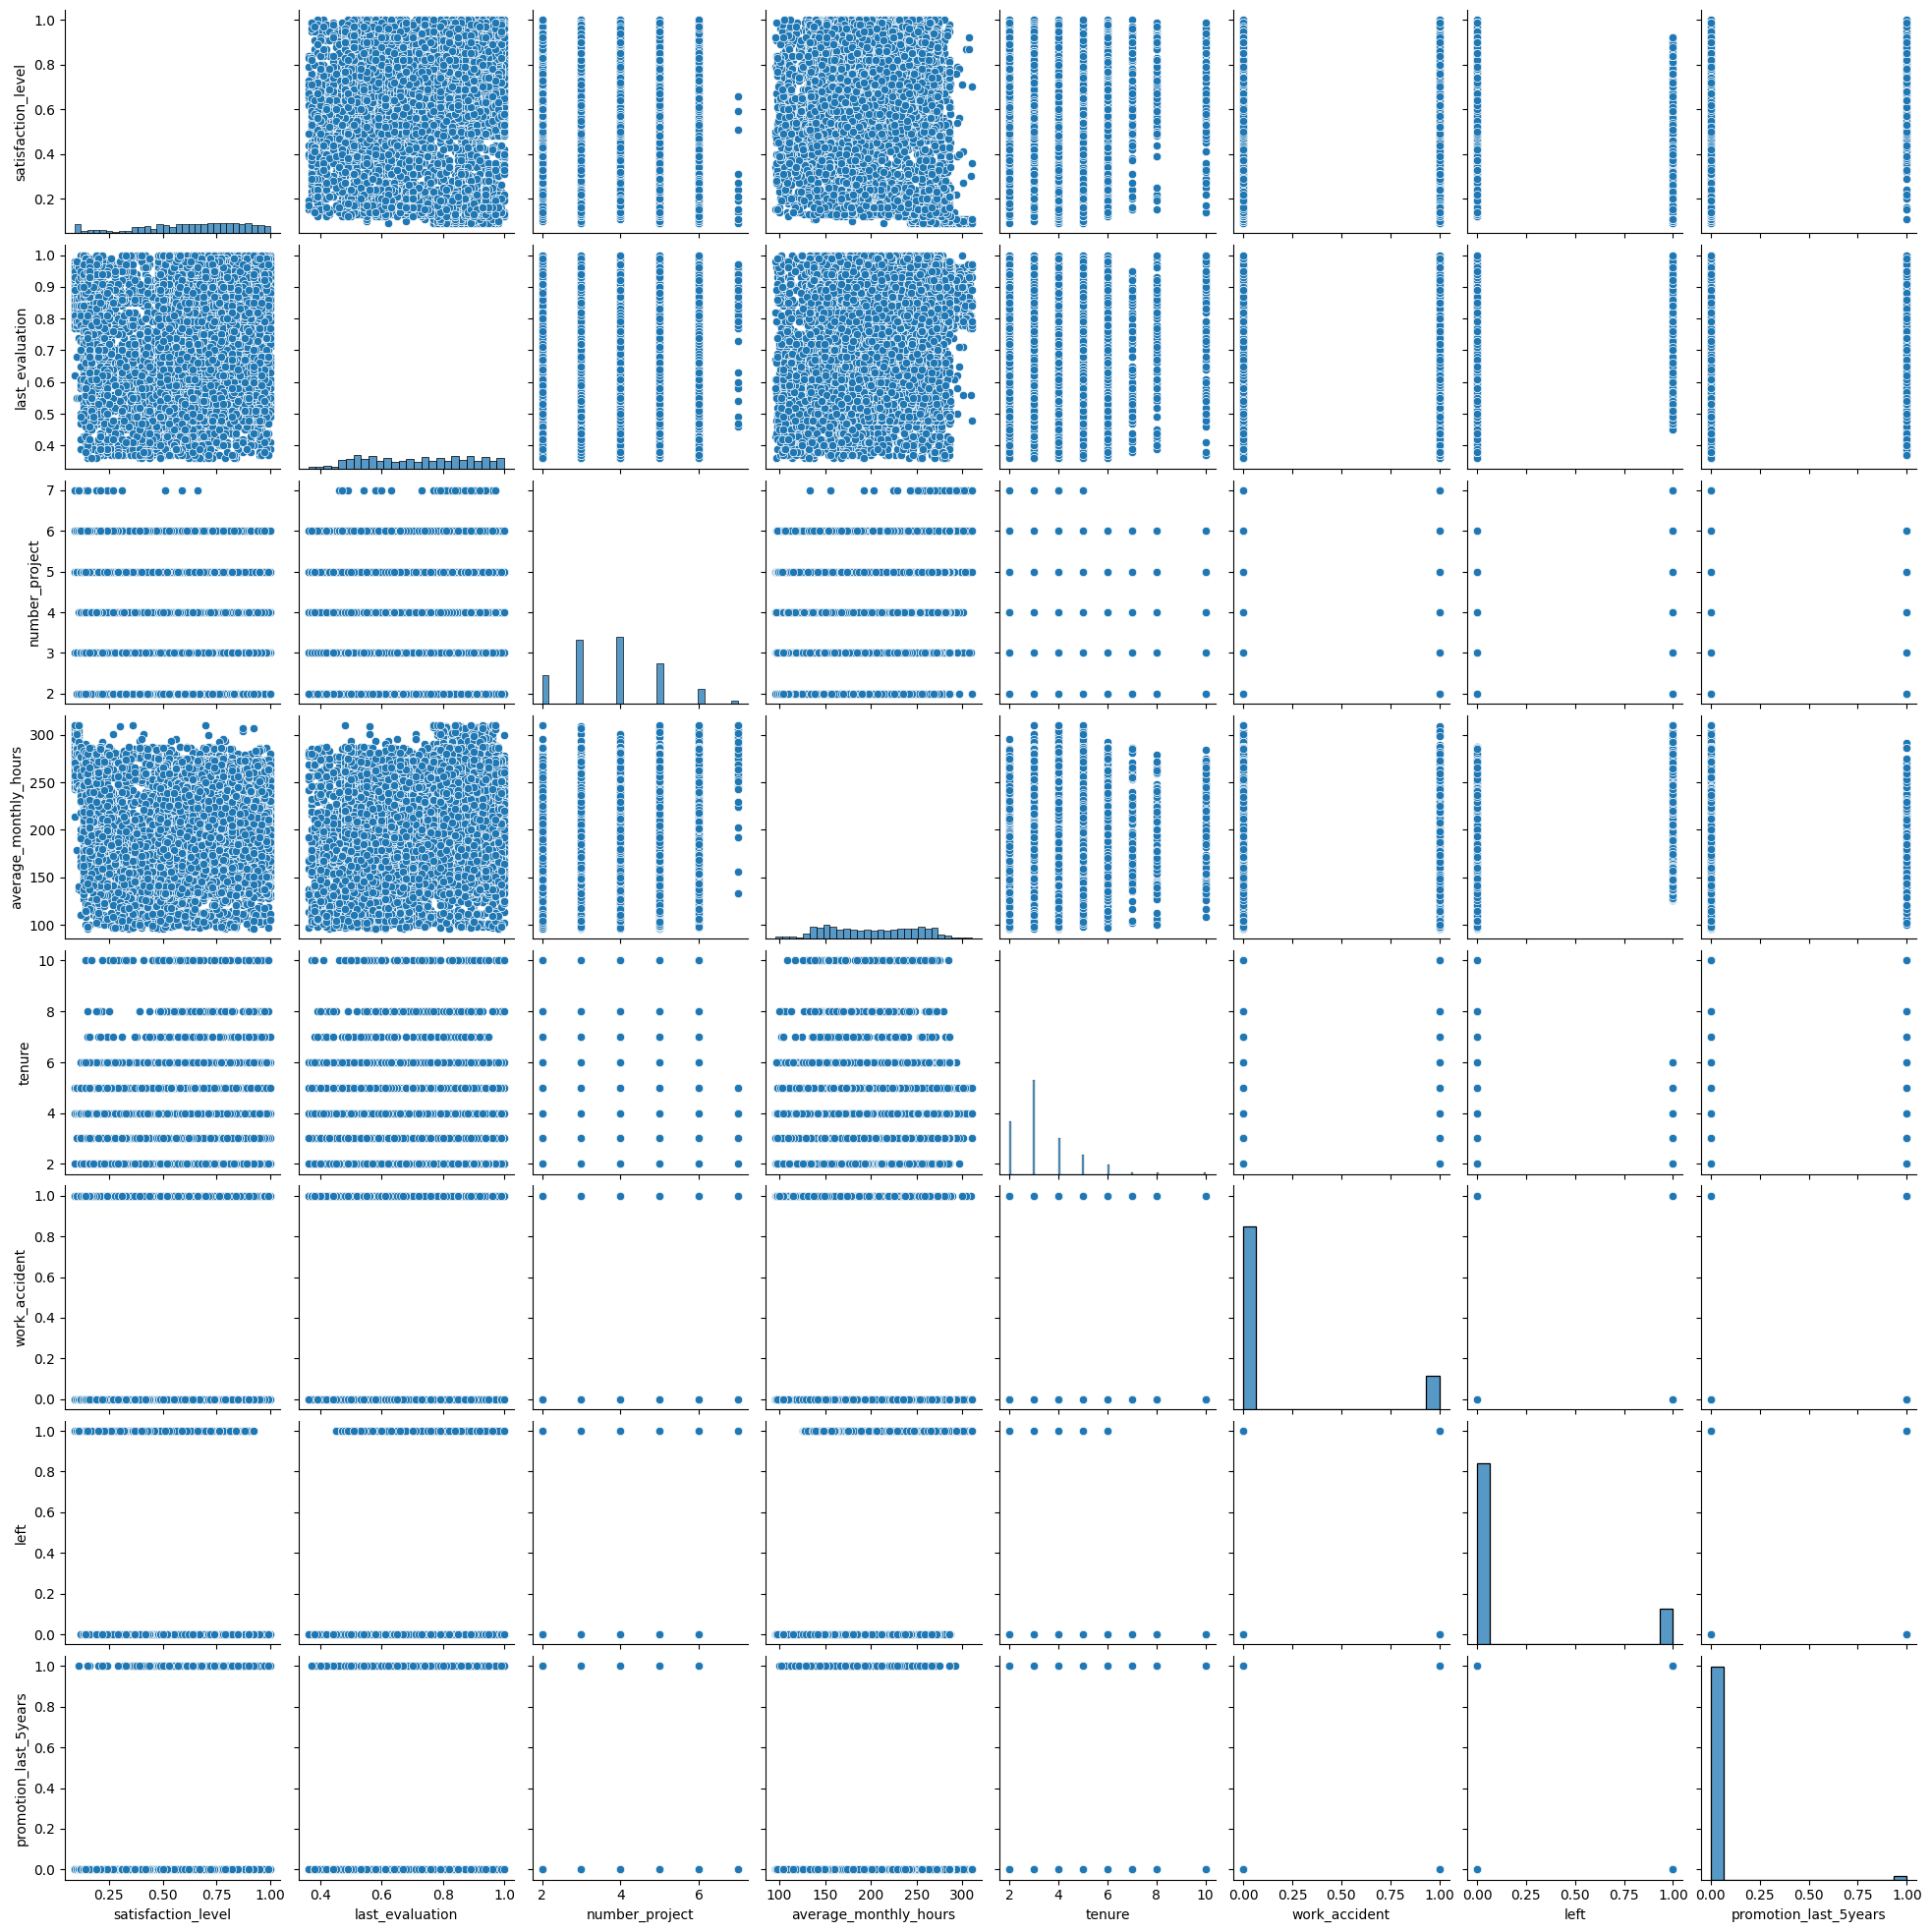

In [57]:
sns.pairplot(df1)

Le pairplot affiche des distributions univariées sur la diagonale et des nuages de points pour les relations entre les variables.

1️ Distribution des Variables (Diagonale)
Certaines variables semblent discrètes avec peu de valeurs possibles (ex. number_project, work_accident, promotion_last_5years).
satisfaction_level et last_evaluation semblent être des variables continues, bien réparties entre 0 et 1.
tenure et number_project montrent des valeurs concentrées sur certains niveaux spécifiques.


2️ Corrélations Visuelles
satisfaction_level vs last_evaluation : Distribution semble aléatoire, mais il peut y avoir une structure cachée.
number_project vs average_monthly_hours : Ces variables semblent fortement corrélées (logique, plus un employé a de projets, plus il travaille d'heures).
work_accident et promotion_last_5years : Variables binaires qui n'affichent pas de tendance claire visuellement.
tenure (ancienneté) semble avoir un effet sur d'autres variables.


3️ Problèmes Possibles
Beaucoup de points superposés : Certaines variables ayant peu de valeurs distinctes, la visualisation peut cacher des tendances.
Présence possible de valeurs aberrantes : Par exemple, dans average_monthly_hours, certaines valeurs semblent très élevées.
Lien entre satisfaction_level et le départ des employés ? → À explorer avec une analyse plus ciblée !

Examinons les heures mensuelles moyennes par rapport aux niveaux de satisfaction.

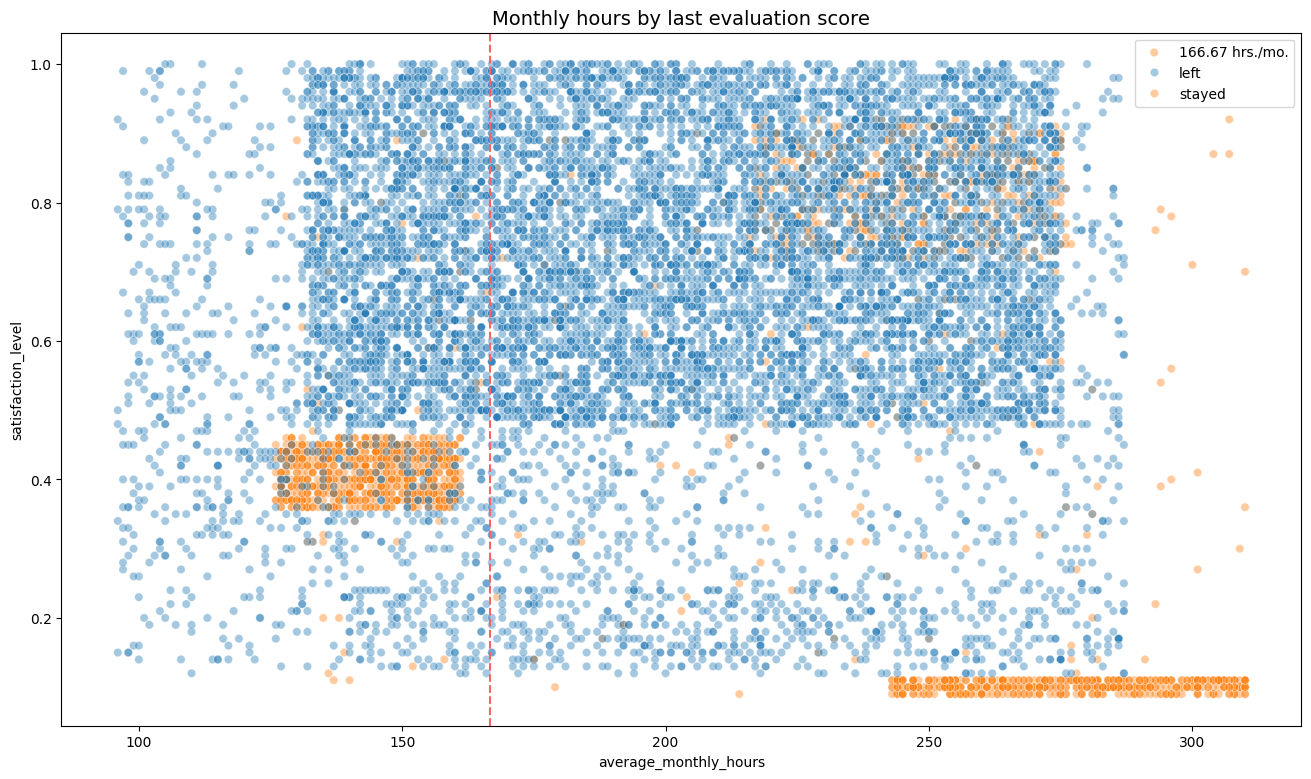

In [43]:
# Create a plot as needed 
### YOUR CODE HERE ###

# Create scatterplot of `average_monthly_hours` versus `satisfaction_level`, comparing employees who stayed versus those who left
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14');

Insights du graphique "Monthly Hours by Last Evaluation Score"
Ce graphique est un scatter plot qui représente la relation entre :

L'axe X : Le nombre moyen d'heures travaillées par mois (average_monthly_hours).
L'axe Y : Le niveau de satisfaction (satisfaction_level).
Les couleurs :
Orange = Employés qui ont quitté (left=1).
Bleu = Employés qui sont restés (left=0).
Ligne rouge verticale = Référence des 166,67 heures par mois (équivalent à 40 heures/semaine).
1. Deux groupes majeurs d’employés ayant quitté (orange)
Observation 1 : Un groupe à faible satisfaction (~0.4) et peu d'heures travaillées (~120-150h)
Ces employés travaillent moins que la moyenne et ont une satisfaction très faible.
Ils se situent bien en dessous de la ligne rouge (166.67h/mois).
Interprétation :

Ces employés ont probablement été licenciés ou mis à l'écart.
Il peut s'agir d’un manque d’engagement, de mauvaise performance ou d’une insatisfaction générale.
L’entreprise devrait analyser si ces employés avaient des opportunités de progression ou un bon encadrement.
Observation 2 : Un autre groupe avec une très forte charge de travail (250-300h/mois)
Ces employés travaillaient bien au-delà de la norme, dépassant 250 heures/mois.
Leur satisfaction est extrêmement basse (~0.1-0.2).
Interprétation :

Ces employés ont probablement démissionné suite à une surcharge de travail.
Un épuisement professionnel (burnout) est une cause évidente.
Solution : L’entreprise doit revoir la répartition des charges et surveiller les heures supplémentaires.
2. Les employés restés ont un éventail plus large de satisfaction
Les employés en bleu (left=0) sont bien répartis sur toute l’échelle de satisfaction.
Cela montre que certains restent malgré une faible satisfaction, peut-être à cause de la stabilité financière ou d’un manque d’alternatives.
Interprétation :

La satisfaction seule n’est pas suffisante pour expliquer le turnover.
Il faut la croiser avec d’autres variables comme la promotion, le salaire et la charge de travail.
3. La majorité des employés travaillent entre 150 et 250 heures
La densité de points bleus est concentrée entre 150h et 250h.
Cela signifie que la plupart des employés restent quand leur charge de travail est raisonnable.
Interprétation :

Un bon équilibre semble être entre 150h et 220h/mois.
L’entreprise peut fixer un seuil critique (ex. : au-dessus de 250h, risque accru de départ).
4. La ligne rouge (166.67h) sert de référence pour la "norme"
Une grande partie des employés restent autour de cette valeur.
Les employés qui quittent sont soit sous-chargés (<150h), soit surchargés (>250h).
Interprétation :

La sous-charge (moins de 150h) et la surcharge (plus de 250h) sont les deux extrêmes à éviter.
L’entreprise doit surveiller les écarts et s’assurer que les employés ne tombent pas dans ces catégories.

### Analyse des graphiques : Satisfaction et Ancienneté (Tenure)

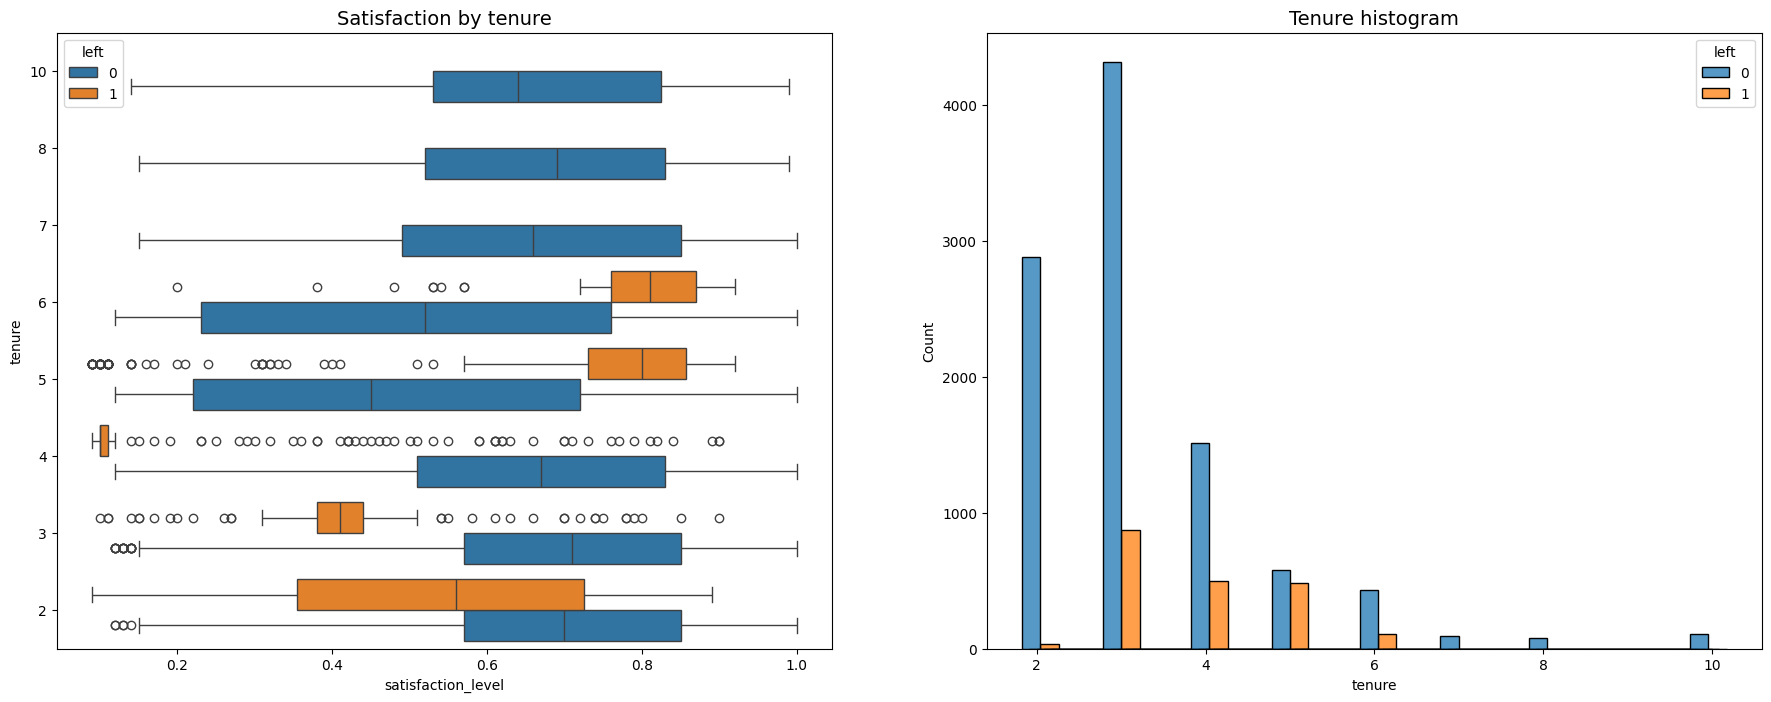

In [44]:
# Create a plot as needed 
### YOUR CODE HERE ###

# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing distributions of `satisfaction_level` by tenure, comparing employees who stayed versus those who left
sns.boxplot(data=df1, x='satisfaction_level', y='tenure', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction by tenure', fontsize='14')

# Create histogram showing distribution of `tenure`, comparing employees who stayed versus those who left
tenure_stay = df1[df1['left']==0]['tenure']
tenure_left = df1[df1['left']==1]['tenure']
sns.histplot(data=df1, x='tenure', hue='left', multiple='dodge', shrink=5, ax=ax[1])
ax[1].set_title('Tenure histogram', fontsize='14')

plt.show()

1. Satisfaction par ancienneté (Boxplot, gauche)
Observations :

Les employés avec 2 ans d’ancienneté ont une faible satisfaction et un taux de départ élevé (left=1 en orange).
Ceux avec 3 ans montrent également un taux de départ significatif.
À partir de 5 ans, les employés qui restent (left=0 en bleu) ont une satisfaction plus variée, mais le turnover diminue.
Les employés avec 6 ans d’ancienneté qui quittent ont une satisfaction modérée (~0.6), ce qui peut indiquer un désintérêt ou une absence de perspectives d’évolution.
Interprétation :

Les employés avec 2-3 ans d'ancienneté sont les plus à risque de quitter.
La satisfaction joue un rôle clé : les employés insatisfaits partent plus vite, surtout au début de leur carrière.
Après 6 ans, le turnover est plus faible, ce qui signifie que les employés qui restent ont probablement trouvé une stabilité.

2. Histogramme de l'ancienneté (Droite)
Observations :

Le plus grand nombre d'employés ont entre 2 et 4 ans d'ancienneté.
Le turnover est particulièrement élevé à 3 ans, suivi de 2 et 4 ans.
Après 6 ans, le turnover devient très faible.
Interprétation :

Les employés quittent principalement après 2-3 ans, probablement à cause du manque d’évolution de carrière ou d’augmentation de salaire.
Ceux qui restent au-delà de 6 ans sont moins susceptibles de partir.
L’entreprise doit se concentrer sur la fidélisation des employés autour de 2-4 ans en offrant des opportunités de promotion et d’augmentation de salaire.


Calculons les scores de satisfaction moyens et médians des employés qui sont partis et de ceux qui ne l’ont pas fait.

In [45]:
# Calculate mean and median satisfaction scores of employees who left and those who stayed
df1.groupby(['left'])['satisfaction_level'].agg([np.mean,np.median])

C:\Users\yohar\AppData\Local\Temp\ipykernel_24776\1074052523.py:2: FutureWarning: The provided callable <function mean at 0x000001AEFF224940> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df1.groupby(['left'])['satisfaction_level'].agg([np.mean,np.median])
C:\Users\yohar\AppData\Local\Temp\ipykernel_24776\1074052523.py:2: FutureWarning: The provided callable <function median at 0x000001AEFF37DC60> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df1.groupby(['left'])['satisfaction_level'].agg([np.mean,np.median])


,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


Comme prévu, les scores de satisfaction moyens et médians des employés qui ont quitté l'entreprise sont inférieurs à ceux des employés qui sont restés. Il est intéressant de noter que parmi les employés qui sont restés, le score de satisfaction moyen semble être légèrement inférieur au score médian. Cela indique que les niveaux de satisfaction parmi ceux qui sont restés pourraient être biaisés vers la gauche.

Examinons les niveaux de salaire pour différentes périodes d'ancienneté.

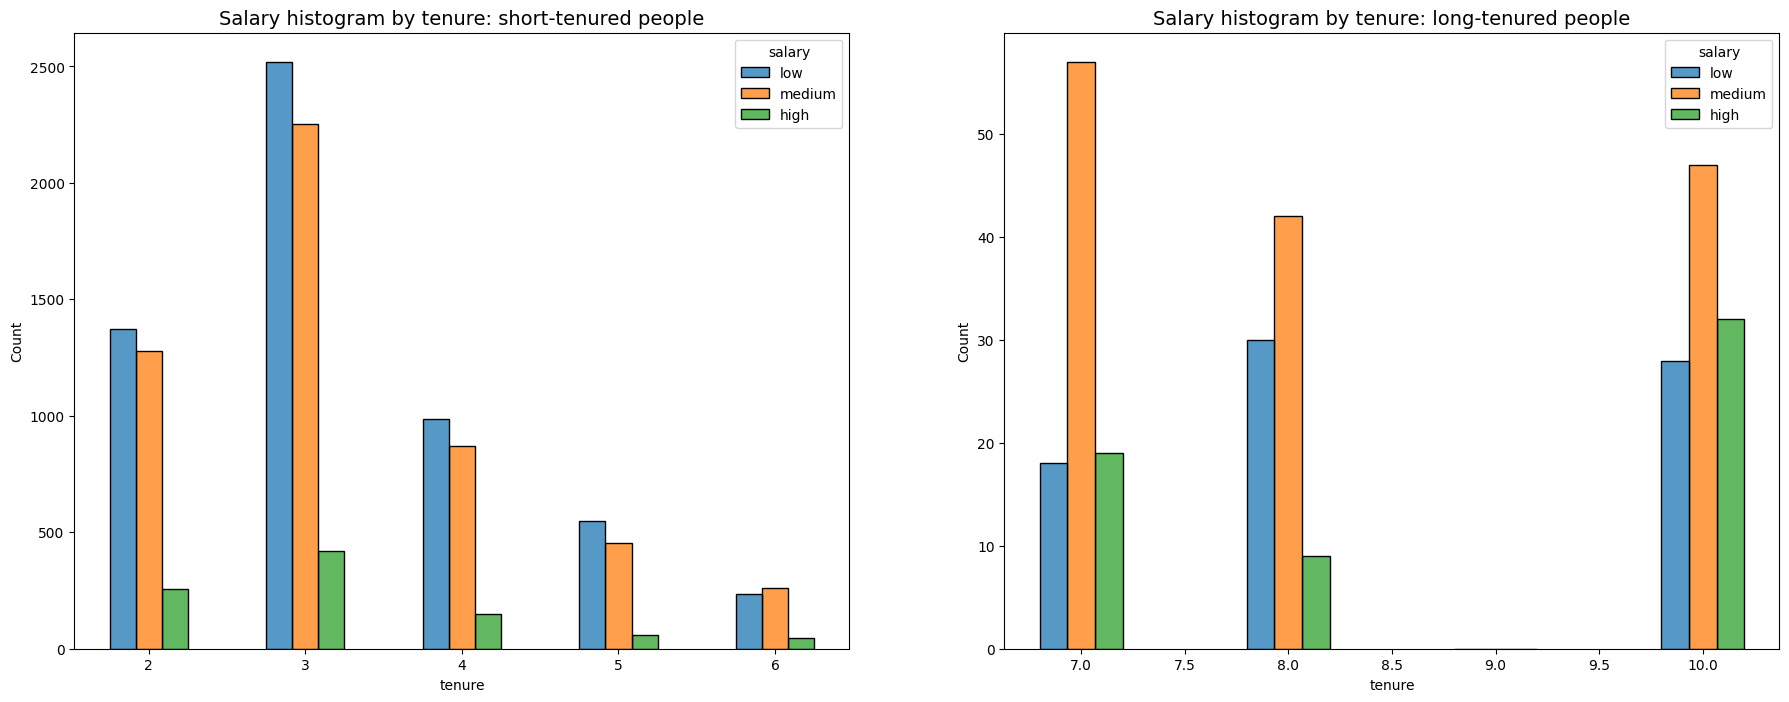

In [46]:
# Create a plot as needed 
### YOUR CODE HERE ###

# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Define short-tenured employees
tenure_short = df1[df1['tenure'] < 7]

# Define long-tenured employees
tenure_long = df1[df1['tenure'] > 6]

# Plot short-tenured histogram
sns.histplot(data=tenure_short, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5, ax=ax[0])
ax[0].set_title('Salary histogram by tenure: short-tenured people', fontsize='14')

# Plot long-tenured histogram
sns.histplot(data=tenure_long, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.4, ax=ax[1])
ax[1].set_title('Salary histogram by tenure: long-tenured people', fontsize='14');

Ce diagramme compare la répartition des niveaux de salaire (low, medium, high) pour deux groupes d’employés selon leur ancienneté (tenure) :

Graphique de gauche : Employés avec une ancienneté courte (2 à 6 ans).
Graphique de droite : Employés avec une ancienneté longue (7 à 10 ans).

1. Employés avec une ancienneté courte (2 à 6 ans) – Graphique de gauche
Observations :

Les employés ayant 2 à 4 ans d’ancienneté sont très nombreux.
La majorité de ces employés ont des salaires faibles (low) ou moyens (medium).
Très peu d’employés ont un salaire élevé (high), surtout pour une ancienneté de 2 à 5 ans.
Interprétation :

Les jeunes employés sont majoritairement sous-payés (low et medium).
Le manque de progression salariale pourrait être un facteur de turnover après 2-3 ans.
Les employés à bas salaire risquent de partir s’ils n’ont pas d’augmentation.
L’entreprise pourrait améliorer la fidélisation en augmentant progressivement les salaires.

2. Employés avec une ancienneté longue (7 à 10 ans) – Graphique de droite
Observations :

Les employés qui restent plus longtemps ont tendance à avoir des salaires plus élevés.
À partir de 10 ans, il y a plus d’employés avec des salaires élevés (high).
Le niveau de salaire "medium" est dominant, même après 7 ans.
Interprétation :

Ceux qui restent longtemps finissent par obtenir des salaires plus élevés.
Cependant, une majorité garde un salaire moyen (medium), ce qui peut créer une frustration pour ceux qui n’évoluent pas financièrement.
Les employés les plus expérimentés sont mieux rémunérés, ce qui motive certains à rester.

Determinons s'il existe une corrélation entre le fait de travailler de longues heures et l'obtention de notes d'évaluation élevées. Vous pouvez créer un diagramme de dispersion entre « average_monthly_hours » et « last_evaluation ».

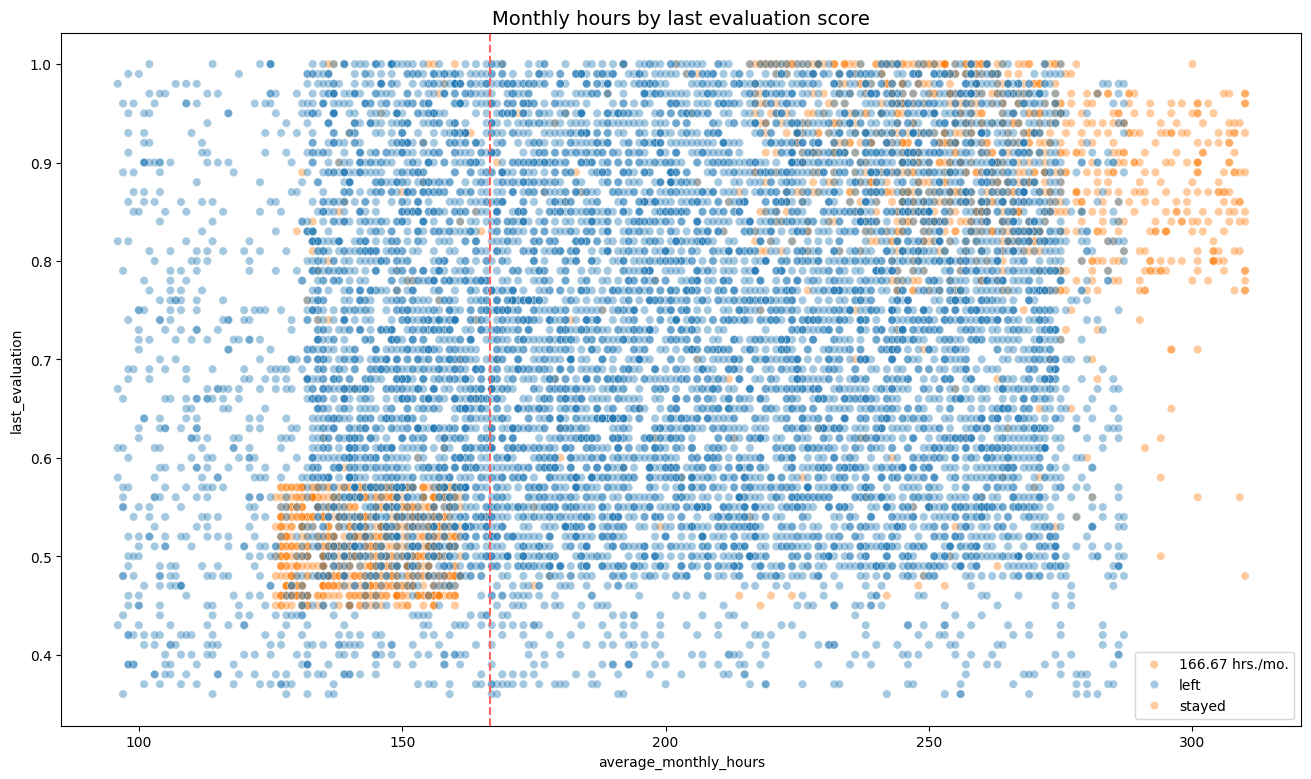

In [47]:
# Create a plot as needed 
### YOUR CODE HERE ###

# Create scatterplot of `average_monthly_hours` versus `last_evaluation`
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14')

On remarque au niveau de  ceux qui ont travaillé moins de 160h en environ 125 et 155, ceux qui sont parti ont une faible satisfaction entre 0,4 et 0,6 environ 
Les employés travaillant entre 150-250h restent majoritairement
Les employés avec de grand horaires partent majoritairement
Les employés avec des faibles horaires aussi partent (peut être du licenciement)

Examinons si les employés qui ont travaillé de très longues heures ont été promus au cours des cinq dernières années.

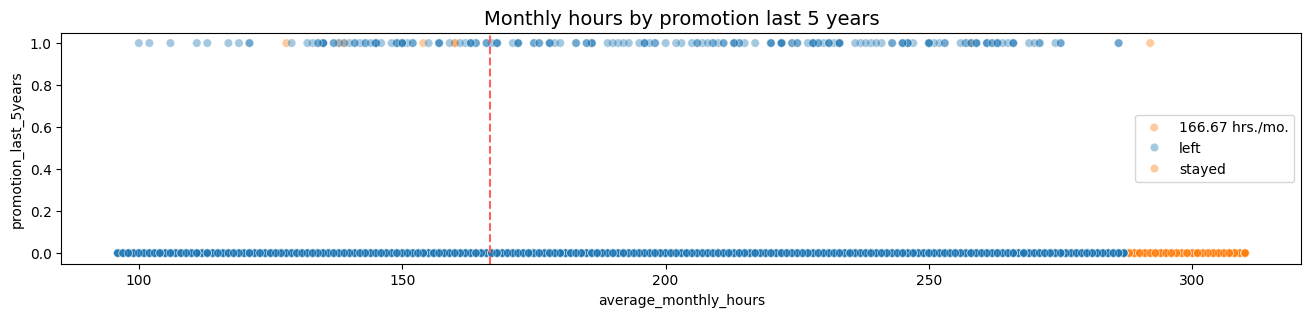

In [48]:
# Create a plot as needed 
plt.figure(figsize=(16, 3))
sns.scatterplot(data=df1, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by promotion last 5 years', fontsize='14');

On remarque sur les 5 dernieres années il y a eu peu de promotions
les employés avec des grosses heure de travail et sans promotions quittent plus rapidement 
les promotions réduisent fortement les départs

Vérifions comment les employés qui sont partis sont répartis entre les services.

In [50]:
# Display counts for each department
df1["department"].value_counts()

department
sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: count, dtype: int64

Text(0.5, 1.0, 'Counts of stayed/left by department')

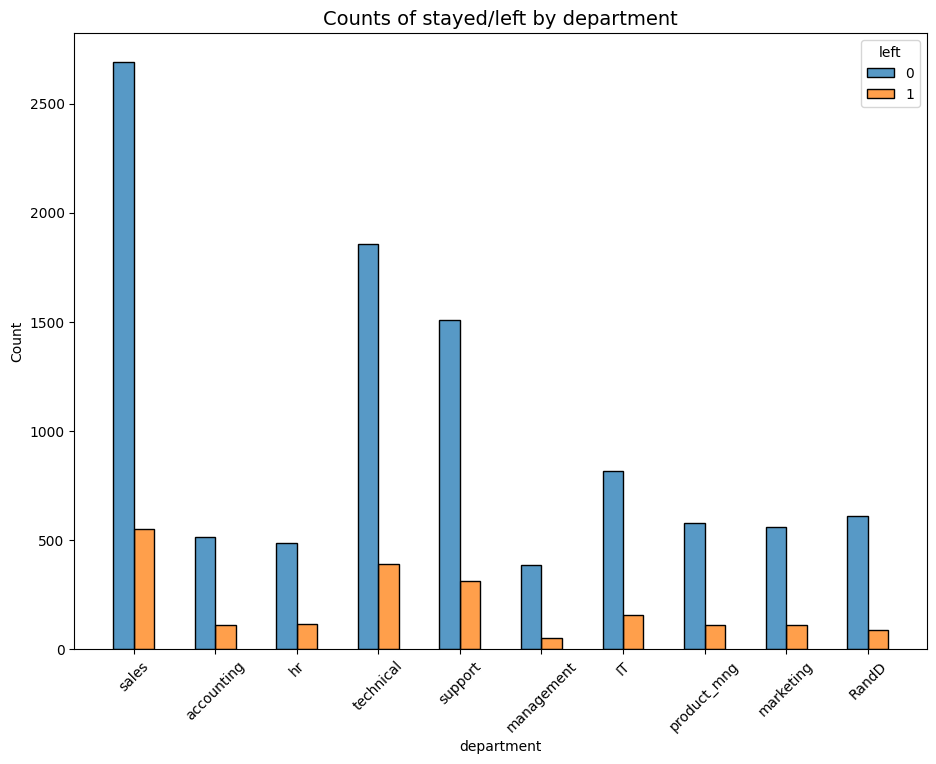

In [53]:
# Create a plot as needed 
### YOUR CODE HERE ###

# Create stacked histogram to compare department distribution of employees who left to that of employees who didn't
plt.figure(figsize=(11,8))
sns.histplot(data=df1, x='department', hue='left', discrete=1, 
             hue_order=[0, 1], multiple='dodge', shrink=.5)
plt.xticks(rotation=45)
plt.title('Counts of stayed/left by department', fontsize=14)

Sales (Ventes) a le plus de départs	Pression élevée


Le support et l’ingénierie ont aussi un turnover élevé



Management et R&D ont peu de départs


Mais en générale les différantes ne sont pas trop flagrantes

Vérifions les fortes corrélations entre les variables dans les données.

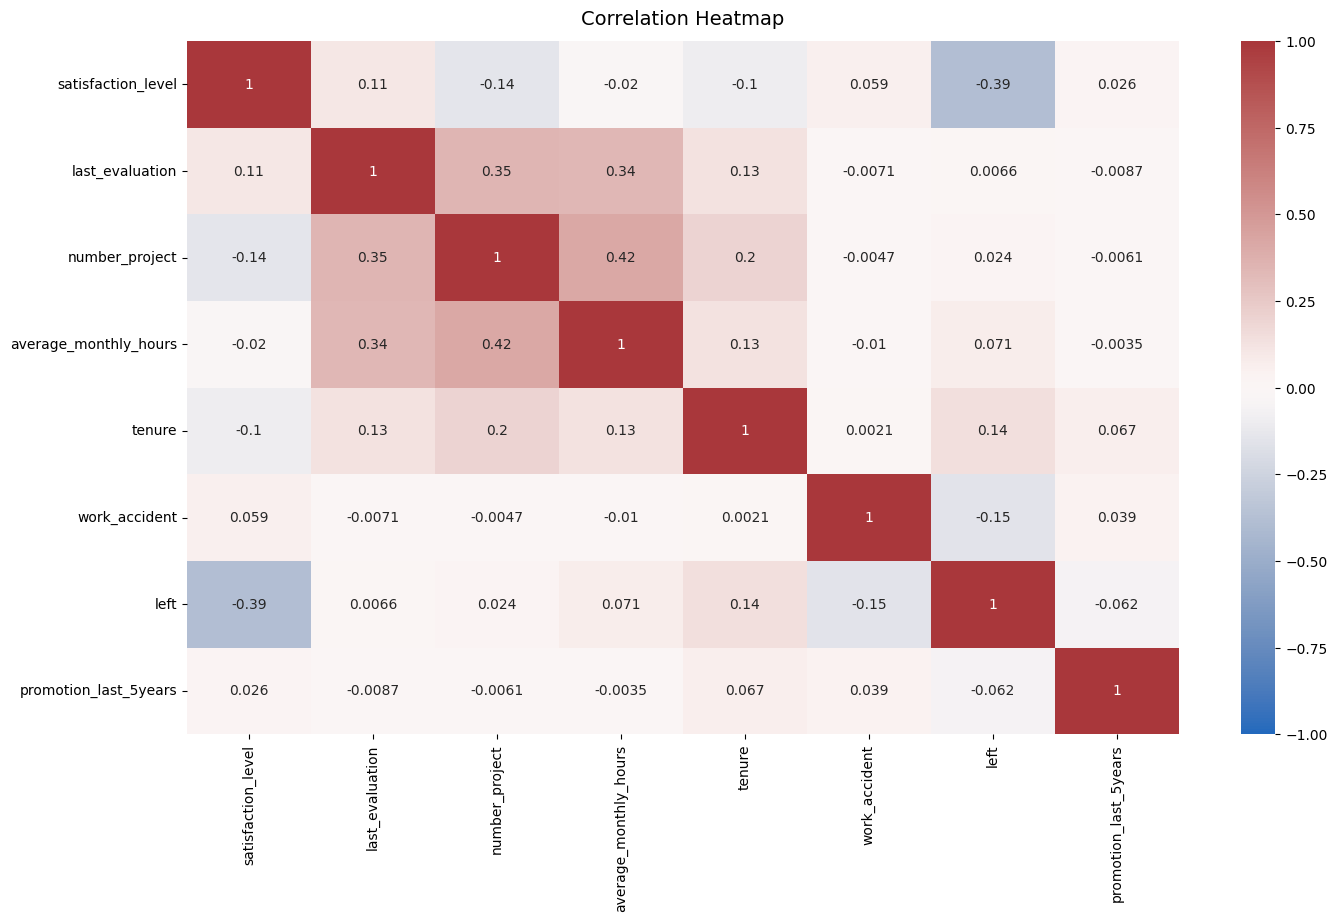

In [56]:
# Sélectionner uniquement les colonnes numériques
df_numeric = df0.select_dtypes(include=['number'])

# Créer la heatmap
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df_numeric.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12)
plt.show()


### Remarques

Variables les plus corrélées avec "left" (Départ des employés)
Satisfaction Level (-0.39)  (Corrélation négative forte)

Les employés avec un faible niveau de satisfaction sont plus susceptibles de partir.

Work Accident (-0.15)
→ Un effet légèrement négatif, mais pas très significatif.

Tenure (0.14)
→ Plus d’ancienneté peut être un facteur influençant le départ.
Average Monthly Hours (0.071)

→ Les employés travaillant beaucoup d’heures pourraient être plus enclins à quitter l’entreprise.

Number of Projects (0.024)
→ Influence très faible sur la décision de départ.


### Autres relations intéressantes
Number of Projects et Average Monthly Hours (0.42) 
→ Plus un employé a de projets, plus il travaille d'heures.
Last Evaluation et Number of Projects (0.35)
→ Les employés mieux évalués semblent gérer plus de projets.

### Insights et Hypothèses
Hypothèse 1 : La satisfaction est un facteur clé du départ
→ Une baisse de satisfaction entraîne un taux de départ élevé.
Hypothèse 2 : Les employés surchargés risquent de partir
→ Une charge de travail élevée (beaucoup d’heures et de projets) peut influencer la décision de départ.
Hypothèse 3 : L’ancienneté joue un rôle
→ Les employés ayant plus d’expérience semblent quitter plus souvent.



# pa`C`e : Construct

Notre objectif est de prédire si un employé quitte l'entreprise, ce qui est une variable de résultat catégorielle. Cette tâche implique donc une classification. Plus précisément, il s'agit d'une classification binaire, puisque la variable de résultat « left » peut être soit 1 (indiquant que l'employé est parti) soit 0 (indiquant que l'employé n'est pas parti).

### Building de notre Model

On va essayer de voir quel model est le mieux approprié pour notre projet

`A - Régression logistique`

In [58]:
# Copy the dataframe
df_enc = df1.copy()

# Encode the `salary` column as an ordinal numeric category
df_enc['salary'] = (
    df_enc['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)

# Dummy encode the `department` column
df_enc = pd.get_dummies(df_enc, drop_first=False)

# Display the new dataframe
df_enc.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,1,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False


On crée un Heatmap pour visualiser la corrélation entre nos variables

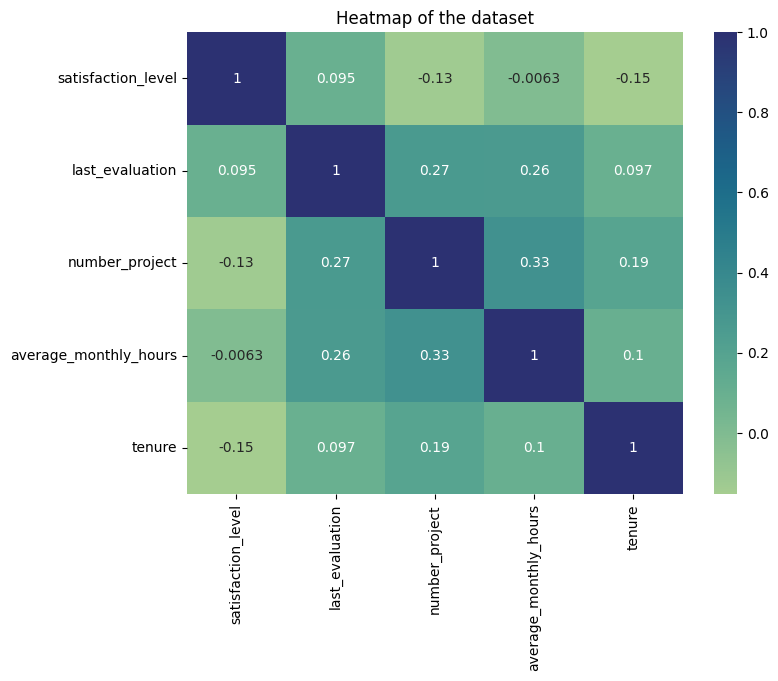

In [59]:
# Create a heatmap to visualize how correlated variables are
plt.figure(figsize=(8, 6))
sns.heatmap(df_enc[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure']]
            .corr(), annot=True, cmap="crest")
plt.title('Heatmap of the dataset')
plt.show()

On crée un graphique à barres empilées pour visualiser le nombre d'employés dans chaque service, en comparant ceux qui sont partis avec ceux qui ne l'ont pas fait.

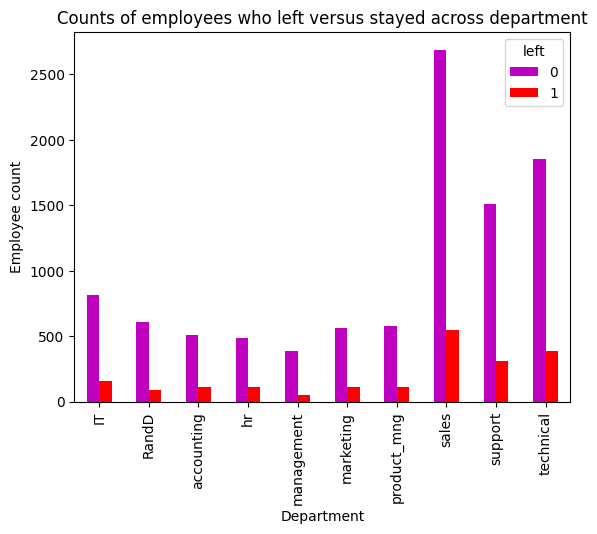

In [60]:
# Create a stacked bart plot to visualize number of employees across department, comparing those who left with those who didn't
# In the legend, 0 (purple color) represents employees who did not leave, 1 (red color) represents employees who left
pd.crosstab(df1['department'], df1['left']).plot(kind ='bar',color='mr')
plt.title('Counts of employees who left versus stayed across department')
plt.ylabel('Employee count')
plt.xlabel('Department')
plt.show()

Vu que la regression logistique est tres sensible au ouliers, on devrait supprimer ceux trouver dans `tenure`

In [61]:
# Select rows without outliers in `tenure` and save resulting dataframe in a new variable
df_logreg = df_enc[(df_enc['tenure'] >= lower_limit) & (df_enc['tenure'] <= upper_limit)]

# Display first few rows of new dataframe
df_logreg.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
5,0.41,0.50,2,153,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False


On isole la variable target `y` que l'on veut prédire 

In [62]:
# Isolate the outcome variable
y = df_logreg['left']

# Display first few rows of the outcome variable
y.head() 

0    1
2    1
3    1
4    1
5    1
Name: left, dtype: int64

Nous allons maintenant retiré le `target` de notre base de données

In [63]:
# Select the features you want to use in your model
X = df_logreg.drop('left', axis=1)

# Display the first few rows of the selected features 
X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,0,0,False,False,False,False,False,False,False,True,False,False
5,0.41,0.50,2,153,3,0,0,0,False,False,False,False,False,False,False,True,False,False


On sépare nos données en `training set` et `testing set`

In [65]:
# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

Maintenant on construit notre model de regression logistique

In [66]:
# Construct a logistic regression model and fit it to the training dataset
log_clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)

Maintenant on test notre model de régression

In [67]:
# Use the logistic regression model to get predictions on the test set
y_pred = log_clf.predict(X_test)

On visualise une matrice de confusion pour voir les résultats de notre model

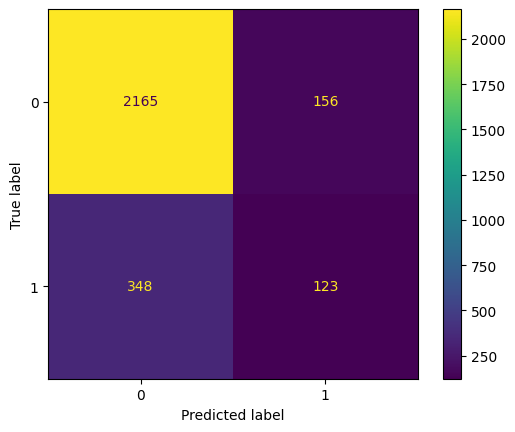

In [68]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, 
                                  display_labels=log_clf.classes_)

# Plot confusion matrix
log_disp.plot(values_format='')

# Display plot
plt.show()

La matrice de confusion présente 4 valeurs clés :


Prédit : 0 (Reste)	Prédit : 1 (Quitte)

Vrai : 0 (Reste)	✅ 2165 (TN)	❌ 156 (FP)

Vrai : 1 (Quitte)	❌ 348 (FN)	✅ 123 (TP)

🔹 `True Negatives` (TN - 2165) : Le modèle a correctement prédit que 2165 employés restent.

🔹 `False Positives` (FP - 156) : Le modèle a prédit que 156 employés partiraient, mais ils sont restés.

🔹 `False Negatives `(FN - 348) : Le modèle a prédit que 348 employés resteraient, mais ils ont quitté. Erreur critique ❗

🔹 `True Positives` (TP - 123) : Le modèle a correctement prédit que 123 employés quittent.


### Interprétation des Résultats

1️ - Le modèle détecte mal les départs !

Beaucoup de FN (348) → Il ne capte pas bien les employés sur le point de partir.
Seuls 123 sur tous les employés partants ont été détectés correctement.

2️ - Bonne détection des employés qui restent

2165 TN montre que le modèle est bon pour reconnaître ceux qui ne quittent pas.

Voyons voir le poucentage des gens qui partent et qui restent

In [69]:
df_logreg['left'].value_counts(normalize=True)

left
0    0.831468
1    0.168532
Name: proportion, dtype: float64

La répartition est d'environ 83 %-17 %. Les données ne sont donc pas parfaitement équilibrées, mais elles ne sont pas trop déséquilibrées. Si elles étaient plus gravement déséquilibrées, on souhaiterait peut-être rééchantillonner les données pour les rendre plus équilibrées. Dans ce cas, on va utiliser utiliser ces données sans modifier l'équilibre des classes et continuer à évaluer le modèle.

On creer une classification pour faire un retour sur notre model

In [70]:
# Create classification report for logistic regression model
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.93      0.90      2321
    Predicted would leave       0.44      0.26      0.33       471

                 accuracy                           0.82      2792
                macro avg       0.65      0.60      0.61      2792
             weighted avg       0.79      0.82      0.80      2792



1️ - Bonne Précision Générale, mais un Déséquilibre

L'accuracy globale de 82% semble correcte, mais elle est biaisée car la classe majoritaire ("Ne quitte pas") domine les prédictions.
La précision (precision) de 86% pour la classe "Ne quitte pas" montre que le modèle identifie bien ceux qui restent.
En revanche, seulement 44% de précision pour les départs → beaucoup de faux positifs (le modèle prédit des départs qui ne se produisent pas).

2️ - Un Rappel Très Faible pour la Classe "left"
Seulement 26% de rappel pour ceux qui partent :
Cela signifie que 74% des employés qui quittent ne sont pas détectés.
C’est un gros problème, car l'objectif est précisément d’identifier ces employés pour agir en amont.
93% de rappel pour "Ne quitte pas" montre que le modèle est biaisé vers la classe majoritaire.

3️ - Le Score F1 est Faible pour les Départs
Le F1-score de 0.33 pour la classe "left" indique que le modèle est peu performant pour cette catégorie.
La moyenne pondérée du F1-score est de 0.80, ce qui est trompeur car elle est dominée par la classe "Ne quitte pas".

`B : Tree-based Model`

On isole notre target

In [71]:
# Isolate the outcome variable
y = df_enc['left']

# Display the first few rows of `y`
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

On retire notre target de notre dataset

In [72]:
# Select the features
X = df_enc.drop('left', axis=1)

# Display the first few rows of `X`
X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,False,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,0,1,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,0,0,False,False,False,False,False,False,False,True,False,False


On divise nos données en training, validating et testing

In [74]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

Decision tree - Round 1

In [77]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {
    'accuracy': 'accuracy',
    'roc_auc': 'roc_auc',
    'precision': 'precision',
    'f1': 'f1',
    'recall': 'recall'
}

# Instantiate GridSearch
tree1 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

On fixe le model aux données d'entrainement

In [78]:
%%time
tree1.fit(X_train, y_train)

CPU times: total: 3.58 s
Wall time: 3.77 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

Identifions le meilleur AUC

In [79]:
# Check best AUC score on CV
tree1.best_score_

np.float64(0.969819392792457)

C'est un super Score ce qui veut dire que notre model peut predir quand les employés vont nous quitter

Une fonction qui extrait tous les scores 

In [81]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
  
    return table


# Get all CV scores
tree1_cv_results = make_results('decision tree cv', tree1, 'auc')
tree1_cv_results

,model,precision,recall,F1,accuracy,auc
0,decision tree cv,0.914552,0.916949,0.915707,0.971978,0.969819


Ce tableau contient les performances d’un modèle d’arbre de décision (Decision Tree CV) évalué à l’aide de cross-validation (CV).

Métrique	Valeur	Explication

Precision	0.9146	Parmi les employés prévus comme "quittant l'entreprise", 91.46% sont effectivement partis.

Recall	0.9169	Le modèle identifie correctement 91.69% des employés qui quittent.

F1-score	0.9157	Moyenne harmonique entre précision et rappel, équilibre entre faux positifs et faux négatifs.

Accuracy	0.9720	97.2% des prédictions sont correctes (toutes classes confondues).

AUC (Area Under Curve)	0.9698	Le modèle distingue très bien les employés qui partent de ceux qui restent (96.98% de chance de bien classifier).

Que signifient ces résultats ?

1️ Le modèle est très performant → Toutes les métriques sont supérieures à 91%, ce qui est un excellent score.

2️ Bonne précision et bon rappel → Peu de faux positifs et peu de faux négatifs, donc le modèle fait peu d’erreurs.

3️ L’Accuracy (97.2%) est élevée → Le modèle classe très bien les employés.

4️ L’AUC (96.98%) montre une très bonne séparation des classes → Le modèle distingue bien les employés qui restent et ceux qui partent.

`Random forest - Round 1`

On va construire un modèle de forêt aléatoire et configurer une recherche de grille à validation croisée pour rechercher de manière exhaustive les meilleurs paramètres du modèle.

In [84]:
# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Assign a dictionary of scoring metrics to capture
scoring = {
    'accuracy': 'accuracy',
    'roc_auc': 'roc_auc',
    'precision': 'precision',
    'f1': 'f1',
    'recall': 'recall'
}

# Instantiate GridSearch
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

On fixe notre model avec les données d'entrainement 

In [85]:
%%time
rf1.fit(X_train, y_train) 

CPU times: total: 25min 42s
Wall time: 27min 27s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

On spécifi l'endroit ou on veut sauvegarder notre model

In [86]:
# Define a path to the folder where you want to save the model
path = ''

Fonction pour sauvegarder notre model et le recuperer 

In [87]:
def write_pickle(path, model_object, save_as:str):
    '''
    In: 
        path:         path of folder where you want to save the pickle
        model_object: a model you want to pickle
        save_as:      filename for how you want to save the model

    Out: A call to pickle the model in the folder indicated
    '''    

    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [88]:
def read_pickle(path, saved_model_name:str):
    '''
    In: 
        path:             path to folder where you want to read from
        saved_model_name: filename of pickled model you want to read in

    Out: 
        model: the pickled model 
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

    return model

On sauvegrade notre model et on le récupere

In [89]:
# Write pickle
write_pickle(path, rf1, 'hr_rf1')

In [90]:
# Read pickle
rf1 = read_pickle(path, 'hr_rf1')

Identification du meilleur AUC

In [91]:
# Check best AUC score on CV
rf1.best_score_

np.float64(0.9804250949807172)

Identification des valeures optimales  pour nos parametres

In [92]:
rf1.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 500}

On compare nos 2 scores

In [93]:
# Get all CV scores
rf1_cv_results = make_results('random forest cv', rf1, 'auc')
print(tree1_cv_results)
print(rf1_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.914552  0.916949  0.915707  0.971978  0.969819
              model  precision    recall        F1  accuracy       auc
0  random forest cv   0.950023  0.915614  0.932467  0.977983  0.980425


Le modèle Random Forest est meilleur que l’arbre de décision sur tous les critères !

Il est plus précis, mieux équilibré et sépare mieux les classes (AUC plus haut).

C’est donc le modèle à privilégier pour prédire les départs des employés.

Maintenant nous allons évaluer nos données sur les données de test

In [95]:
#Une fonction qui recupère tous les scores d'un model de prédiction
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In: 
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })
  
    return table

rf1_test_scores = get_scores('random forest1 test', rf1, X_test, y_test)
rf1_test_scores

,model,precision,recall,f1,accuracy,AUC
0,random forest1 test,0.964211,0.919679,0.941418,0.980987,0.956439


Les résultats des tests sont très similaires aux résultats de validation, ce qui est une bonne chose. Il semble que ce modèle soit solide. Étant donné que cet ensemble de tests n'a été utilisé que pour ce modèle, vous pouvez être plus sûr que les performances de votre modèle sur ces données sont représentatives de ses performances sur des données nouvelles et inédites.

Feature Engineering

Je suis sceptique quant aux scores d'évaluation élevés. Il existe un risque de fuite de données. 

Il est probable que l'entreprise n'ait pas de niveaux de satisfaction signalés pour tous ses employés. Il est également possible que la colonne `average_monthly_hours` soit une source de fuite de données. Si les employés ont déjà décidé de démissionner ou ont déjà été identifiés par la direction comme des personnes à licencier, ils peuvent travailler moins d'heures.

La première série de modèles d'arbres de décision et de forêts aléatoires incluait toutes les variables comme caractéristiques. Cette prochaine série intégrera l'ingénierie des caractéristiques pour créer des modèles améliorés.

On va procéder en abandonnant `satisfaction_level` et en créant une nouvelle fonctionnalité qui capture approximativement si un employé est surmené. On pourrait appeler cette nouvelle fonctionnalité « surchargée ». Ce sera une variable binaire.

In [96]:
# Drop `satisfaction_level` and save resulting dataframe in new variable
df2 = df_enc.drop('satisfaction_level', axis=1)

# Display first few rows of new dataframe
df2.head()

,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
1,0.86,5,262,6,0,1,0,1,False,False,False,False,False,False,False,True,False,False
2,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False
3,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False
4,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False


In [97]:
# Create `overworked` column. For now, it's identical to average monthly hours.
df2['overworked'] = df2['average_monthly_hours']

# Inspect max and min average monthly hours values
print('Max hours:', df2['overworked'].max())
print('Min hours:', df2['overworked'].min())

Max hours: 310
Min hours: 96


In [98]:
# Define `overworked` as working > 175 hrs/week
df2['overworked'] = (df2['overworked'] > 175).astype(int)

# Display first few rows of new column
df2['overworked'].head()

0    0
1    1
2    1
3    1
4    0
Name: overworked, dtype: int64

On supprime le `average_monthly_hours`

In [99]:
# Drop the `average_monthly_hours` column
df2 = df2.drop('average_monthly_hours', axis=1)

# Display first few rows of resulting dataframe
df2.head()

,last_evaluation,number_project,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,overworked
0,0.53,2,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False,0
1,0.86,5,6,0,1,0,1,False,False,False,False,False,False,False,True,False,False,1
2,0.88,7,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False,1
3,0.87,5,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False,1
4,0.52,2,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False,0


On reprend notre Décision tree - Round 2

In [103]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy': "accuracy", 'precision': "precision", 'recall': "recall", 'f1': "f1", 'roc_auc': "roc_auc"}

# Instantiate GridSearch
tree2 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [104]:
%%time
tree2.fit(X_train, y_train)

CPU times: total: 3.73 s
Wall time: 4.21 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

In [105]:
# Check best params
tree2.best_params_

{'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 2}

In [106]:
# Check best AUC score on CV
tree2.best_score_

np.float64(0.969819392792457)

Ce model fonctionne plutôt bien même sans les données qu'on a retirer

Regardons les autres scores

In [107]:
# Get all CV scores
tree2_cv_results = make_results('decision tree2 cv', tree2, 'auc')
print(tree1_cv_results)
print(tree2_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.914552  0.916949  0.915707  0.971978  0.969819
               model  precision    recall        F1  accuracy       auc
0  decision tree2 cv   0.914552  0.916949  0.915707  0.971978  0.969819


Certains autres scores ont baissé. C'est normal étant donné que moins de caractéristiques ont été prises en compte dans cette phase du modèle. Les scores sont néanmoins très bons.

Random forest - Round 2

In [108]:
# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy': "accuracy", 'precision': "precision", 'recall': "recall", 'f1': "f1", 'roc_auc': "roc_auc"}

# Instantiate GridSearch
rf2 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [109]:
%%time
rf2.fit(X_train, y_train) # --> Wall time: 7min 5s

CPU times: total: 19min 48s
Wall time: 20min 43s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

In [ ]:
# Write pickle
write_pickle(path, rf2, 'hr_rf2')

In [ ]:
# Read in pickle
rf2 = read_pickle(path, 'hr_rf2')

In [ ]:
# Check best params
rf2.best_params_

In [ ]:
# Check best AUC score on CV
rf2.best_score_

In [ ]:
# Get all CV scores
rf2_cv_results = make_results('random forest2 cv', rf2, 'auc')
print(tree2_cv_results)
print(rf2_cv_results)

Le random forest à  de meilleures performances

Nous allons donc l'utiliser pour la suite afin d'obtenir le score

In [ ]:
# Get predictions on test data
rf2_test_scores = get_scores('random forest2 test', rf2, X_test, y_test)
rf2_test_scores

In [ ]:
# Generate array of values for confusion matrix
preds = rf2.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=rf2.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf2.classes_)
disp.plot(values_format='')

Le modèle prédit plus de faux positifs que de faux négatifs, ce qui signifie que certains employés peuvent être identifiés comme risquant de démissionner ou d'être licenciés, alors que ce n'est pas le cas. Mais il s'agit toujours d'un modèle solide.

À des fins d'exploration, nous allons inspecter les divisions du modèle d'arbre de décision et les caractéristiques les plus importantes du modèle de forêt aléatoire.

In [ ]:
# Plot the tree
plt.figure(figsize=(85,20))
plot_tree(tree2.best_estimator_, max_depth=6, fontsize=14, feature_names=X.columns, 
          class_names={0:'stayed', 1:'left'}, filled=True);
plt.show()

In [ ]:
#tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, columns=X.columns)
tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X.columns
                                )
tree2_importances = tree2_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
tree2_importances = tree2_importances[tree2_importances['gini_importance'] != 0]
tree2_importances

In [ ]:
sns.barplot(data=tree2_importances, x="gini_importance", y=tree2_importances.index, orient='h')
plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

In [ ]:
# Get feature importances
feat_impt = rf2.best_estimator_.feature_importances_

# Get indices of top 10 features
ind = np.argpartition(rf2.best_estimator_.feature_importances_, -10)[-10:]

# Get column labels of top 10 features 
feat = X.columns[ind]

# Filter `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

1️ Les facteurs les plus influents :

last_evaluation (Évaluation de performance)

→ Les employés avec des évaluations très basses ou très hautes sont plus susceptibles de partir.

number_project (Nombre de projets) 

→ Trop peu ou trop de projets peut être un indicateur de départ (ennui ou burnout).

2️ Les facteurs secondaires :

tenure (ancienneté) : Influence modérée → Les employés récents ou très anciens peuvent être plus enclins à partir.

overworked (surcharge de travail) : Un facteur pertinent, mais légèrement moins influent dans Random Forest.

3️ Les facteurs les moins influents :

Le salaire et le département ont un impact faible sur la prédiction des départs.
Les accidents de travail (work_accident) n’ont presque aucune influence.

# pac`E` : Execute

### Conclusion
L’analyse des modèles et l’importance des variables confirment que la surcharge de travail est un facteur clé de départ des employés.

Les employés ayant trop ou trop peu de projets sont plus enclins à quitter.

Les employés avec des évaluations très basses ou très hautes sont également à risque.

L’ancienneté influence le départ, notamment autour de 4 ans d’expérience.

Le modèle Random Forest a obtenu les meilleurs résultats avec un AUC de 98.04%, prouvant sa capacité à bien distinguer les employés qui restent et ceux qui partent.



### Recommandations pour Améliorer la Rétention

Pour limiter le taux de rotation des employés, voici des actions à proposer aux stakeholders :

1️ Limiter le nombre de projets par employé pour éviter surcharge et burnout.

2️ Évaluer les opportunités de promotion après 4 ans d’ancienneté ou analyser pourquoi ces employés sont insatisfaits.

3️ Revoir la gestion du temps de travail :

Récompenser les employés pour les heures supplémentaires ou s’assurer qu’ils ne sont pas obligés d’en faire.

Clarifier les politiques de rémunération des heures supplémentaires.
Définir des attentes claires sur la charge de travail et le droit au repos.
4️ Organiser des discussions internes sur la culture d’entreprise pour identifier et résoudre les problèmes RH.

5️ Réformer le système d’évaluation des performances :
Éviter d’associer une haute évaluation uniquement aux employés travaillant +200 heures/mois.
Mettre en place une échelle proportionnelle de reconnaissance pour valoriser la contribution réelle de chacun.

###  Prochaines Étapes

1️ Vérifier s’il y a encore une fuite de données (Data Leakage)

Tester le modèle sans la variable last_evaluation pour voir si les prédictions restent fiables.

Vérifier si les évaluations sont trop liées aux départs, et envisager un modèle qui prédit plutôt la performance.

2️ Explorer d'autres approches analytiques

Construire un modèle K-Means pour identifier des profils types d’employés à risque.

Analyser la rotation du personnel sur plusieurs années (séries temporelles) pour mieux anticiper les départs.

3️ Tester XGBoost et optimiser les hyperparamètres de Random Forest

Vérifier si XGBoost peut surpasser Random Forest.

Affiner les paramètres pour améliorer encore la précision du modèle.

## Conclusion finale
Les résultats sont clairs : l’entreprise doit agir sur la surcharge de travail, la reconnaissance des employés et l’équilibre entre performance et bien-être. En appliquant ces recommandations, elle pourra améliorer la satisfaction des employés, réduire le turnover et optimiser les coûts de recrutement et formation.